In [1]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Necessary libraries
import os 
# Set Directory path for Dataset for Assia
os.chdir("/content/drive/My Drive/Covid19-Newspaper-Topic-Modeling")

In [3]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 2.9MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=d419093e5022892a4a90105c598658ffbc1c67cf3b054a53e214f6dcb07bee1f
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [4]:
# setting up our imports
%matplotlib inline
import pickle
from pprint import pprint
import random
import warnings
import time

import numpy as np
import pandas as pd

import gensim 
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary
import pyLDAvis.gensim #LDA visualization library

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


In [5]:
# loading our corpus and dictionary
try:
    
    dictionary = Dictionary.load('dictionary.gensim')
except FileNotFoundError as e:
    raise ValueError("SKIP: Please download the Corpus ")

corpus = pd.read_pickle('corpus.pkl')

output_words = pd.read_pickle('output_words.pkl')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [6]:
output_words

[['high',
  'number',
  'death',
  'day',
  'people',
  'high',
  'number',
  'hour',
  'far',
  'die',
  'infection',
  'yesterday',
  'health',
  'service',
  'death',
  'toll',
  'stand',
  'people',
  'test',
  'positive',
  'covid',
  'last',
  'hour',
  'high',
  'span',
  'hour',
  'total',
  'number',
  'infect',
  'reach',
  'total',
  'sample',
  'test',
  'lab',
  'country',
  'covid',
  'patient',
  'recover',
  'country',
  'last',
  'hour',
  'total',
  'recovery',
  'number',
  'stand',
  'dghs',
  'official',
  'decease',
  'female',
  'child',
  'age',
  'rest',
  'year',
  'oldtwelve',
  'decease',
  'pabna',
  'cumilla',
  'official',
  'total',
  'people',
  'put',
  'isolation',
  'last',
  'hour'],
 ['throw',
  'job',
  'tangail',
  'maker',
  'hard',
  'day',
  'worker',
  'engage',
  'produce',
  'famous',
  'delicacy',
  'tangail',
  'pass',
  'hard',
  'day',
  'closure',
  'sell',
  'item',
  'due',
  'lockdown',
  'impose',
  'contain',
  'shop',
  'sell',
 

In [7]:
NUM_TOPICS = 8
print('Training LDA model with 8 topics')
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics= NUM_TOPICS, 
                                            random_state=89, 
                                            update_every=1,  
                                            id2word= dictionary, 
                                            passes=42, 
                                            alpha='auto', 
                                            per_word_topics= True
                                             )


Training LDA model with 8 topics


In [8]:
perplexity = ldamodel.log_perplexity(corpus)
print("preplexity = ",  perplexity)
coherence_model_lda = CoherenceModel(model=ldamodel, texts=output_words, dictionary= dictionary, coherence='c_v')
print("coherence 1: ", coherence_model_lda.get_coherence())

preplexity =  -7.333882204142714
coherence 1:  0.4857537502566897


In [9]:
# Save the model 
pickle.dump(ldamodel, open('ldamodel8.pkl', 'wb'))

In [10]:
# Print the Keyword in the 10 topics
pprint(ldamodel.print_topics())

[(0,
  '0.034*"passenger" + 0.033*"flight" + 0.023*"return" + 0.018*"country" + '
  '0.016*"leave" + 0.011*"citizen" + 0.010*"due" + 0.009*"suspend" + '
  '0.009*"strand" + 0.008*"airline"'),
 (1,
  '0.017*"government" + 0.014*"worker" + 0.012*"close" + 0.009*"police" + '
  '0.008*"people" + 0.008*"open" + 0.008*"decision" + 0.008*"market" + '
  '0.008*"order" + 0.008*"factory"'),
 (2,
  '0.027*"people" + 0.024*"government" + 0.015*"provide" + 0.012*"work" + '
  '0.012*"food" + 0.011*"give" + 0.010*"country" + 0.010*"relief" + '
  '0.010*"doctor" + 0.009*"hospital"'),
 (3,
  '0.017*"case" + 0.014*"virus" + 0.013*"people" + 0.009*"spread" + '
  '0.009*"country" + 0.008*"death" + 0.008*"report" + 0.007*"week" + '
  '0.007*"government" + 0.006*"time"'),
 (4,
  '0.022*"hospital" + 0.022*"sample" + 0.021*"home" + 0.021*"test" + '
  '0.021*"corona" + 0.018*"die" + 0.017*"people" + 0.016*"send" + '
  '0.014*"collect" + 0.013*"doctor"'),
 (5,
  '0.011*"country" + 0.009*"global" + 0.008*"econom

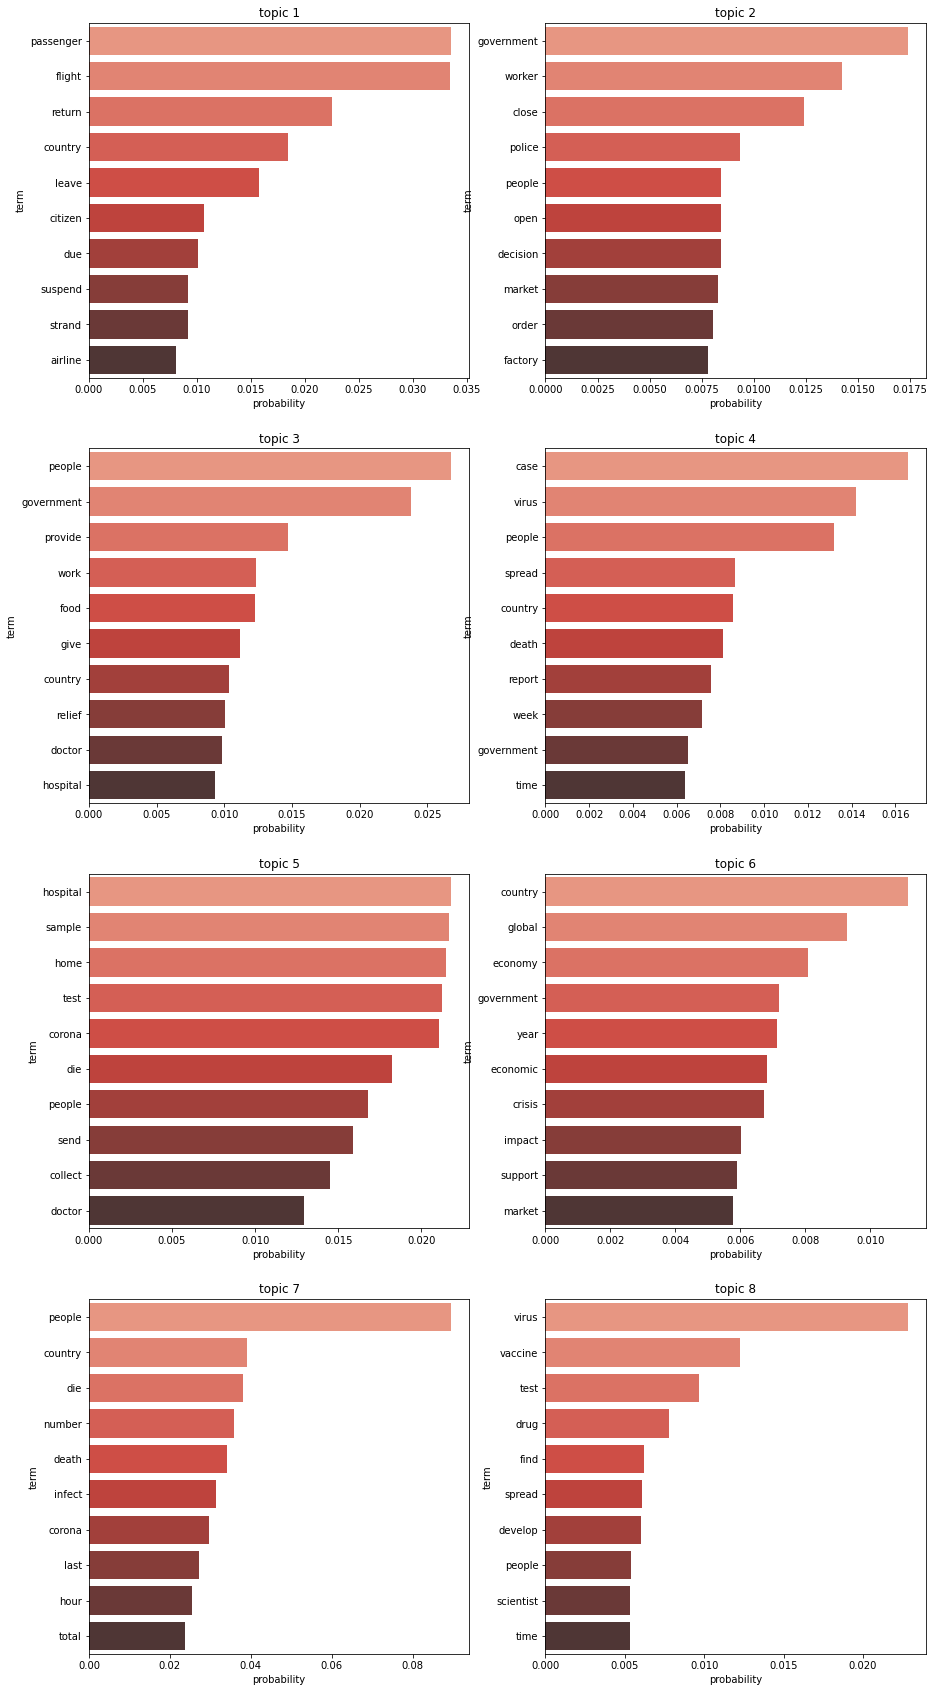

In [11]:
import seaborn as sns
fiz = plt.figure(figsize=(15,30))
for i in range(8):
    df = pd.DataFrame(ldamodel.show_topic(i), columns=['term','prob']).set_index('term')
    # df=df.sort_values('prob')
    
    plt.subplot(4,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()

In [12]:
# loading model
optimal_model = pd.read_pickle('ldamodel8.pkl')


In [13]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [14]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=output_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.8659,"people, country, die, number, death, infect, c...","[high, number, death, day, people, high, numbe..."
1,1,1.0,0.4528,"government, worker, close, police, people, ope...","[throw, job, tangail, maker, hard, day, worker..."
2,2,3.0,0.4440,"case, virus, people, spread, country, death, r...","[cope, covid, shutdown, family, reaping, benef..."
3,3,4.0,0.8053,"hospital, sample, home, test, corona, die, peo...","[family, member, test, positive, bogura, least..."
4,4,1.0,0.6031,"government, worker, close, police, people, ope...","[issue, official, effort, contain, today, issu..."
5,5,4.0,0.9406,"hospital, sample, home, test, corona, die, peo...","[test, positive, wife, late, former, test, pos..."
6,6,1.0,0.7615,"government, worker, close, police, people, ope...","[bangabazar, market, shut, ensure, covid, safe..."
7,7,2.0,0.8490,"people, government, provide, work, food, give,...","[provide, ppe, hand, set, high, quality, healt..."
8,8,4.0,0.6243,"hospital, sample, home, test, corona, die, peo...","[engineer, find, dead, gazipur, executive, eng..."
9,9,4.0,0.9248,"hospital, sample, home, test, corona, die, peo...","[family, test, covid, positive, member, family..."


## Topic terminology
- topic 0: Repatriation and Travel 
- topic 1: Governement mobilization 
- topic 2 : Aid and relief 
- topic 3 : Pandemic updates 
- topic 4 : Tracking and testing
- topic 5: Economy
- topic 6 : Statistics
- topic 7 : Covid19 treatments

### Add column topic to data

In [15]:
# data non labeled
data = pd.read_csv('Final Dataset NEWSPAPERBD.csv')
data.head(10)

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category
0,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-13 13:28:15+06:00,Chittagong,Chittagong,Bangladesh,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,Highest number of Covid-19 deaths in a day,Nineteen people -- the highest number in 24 ho...,Nineteen people -- the highest number in 24 ho...,Statistics,NaN
1,https://www.thedailystar.net/country/news/thro...,The Daily Star,2020-05-13 00:00:00+06:00,Dhaka,Dhaka,Bangladesh,"চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...","Thrown out of job, Tangail’s chamcham makers p...",Around 1000 workers engaged in producing chamc...,As the chamcham shops are closed due to the lo...,COVID-19 Effects,Global economic impact of Corona virus
2,https://www.thedailystar.net/country/news/copi...,The Daily Star,2020-05-13 00:00:00+06:00,Chittagong,Chittagong,Bangladesh,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,Coping with Covid-19 Shutdown: 200 families re...,Family squabbles were becoming all too common ...,"The volunteer students, under the banner 'Sabu...",Social Information,Social impact
3,https://www.thedailystar.net/country/news/7-fa...,The Daily Star,2020-05-12 23:00:04+06:00,Dhaka,Dhaka,Bangladesh,"বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...","7 family members, 4 police personnel test posi...",At least eleven people tested positive for cor...,At least eleven people tested positive for cor...,COVID-19 Effects,Positive patient symptoms and identification
4,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-12 21:27:34+06:00,Dhaka,Dhaka,Bangladesh,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,Coronavirus: Health ministry issues 13 directi...,In an effort to contain the spread of coronovi...,In an effort to contain the spread of coronovi...,Government Announcement and responses,"Government guidelines, instructions and mobili..."
5,https://www.thedailystar.net/coronavirus-deadl...,The Daily Star,2020-05-13 01:37:07+06:00,Chittagong,Chittagong,Bangladesh,হাসিনা মহিউদ্দিন কোভিড -১৯ এর জন্য ইতিবাচক পরী...,Hasina Mohiuddin tests positive for Covid-19,"Hasina Mohiuddin, wife of late Awami League le...","Hasina Mohiuddin, wife of late Awami League le...",COVID-19 Effects,Positive patient symptoms and identification
6,https://www.thedailystar.net/bangabazar-market...,The Daily Star,2020-05-12 17:36:59+06:00,Chittagong,Chittagong,Bangladesh,কোবিড -১৯ সুরক্ষা নির্দেশনা নিশ্চিত না করায় ব...,Bangabazar market shut for not ensuring Covid-...,Police today shut down Bangabazar market and t...,Police today shut down Bangabazar market and t...,COVID-19 Responses and Preventive measure,Strategic preparedness and response plan
7,https://www.thedailystar.net/coronavirus-outbr...,The Daily Star,2020-05-12 17:26:54+06:00,NaN,Kuwait City,Kuwait,করোনাভাইরাস প্রাদুর্ভাব: জাপান বাংলাদেশকে ২ হা...,"Coronavirus outbreak: Japan provides 2,000 PPE...","Japan handed over 2,000 sets of high quality p...","Japan handed over 2,000 sets of high quality p...",International Information,"External support, Aids"
8,https://www.thedailystar.net/country/news/gazi...,The Daily Star,2020-05-12 22:32:23+06:00,Gazipur,Dhaka,Bangladesh,গাজীপুরের সিটি এক্সিকিউটিভ ইঞ্জিনিয়ার মৃত অবস...,Gazipur city executive engineer found dead,Gazipur City Corporation's executive engineer ...,Gazipur City Corporation's executive engineer ...,COVID-19 Effects,Positive patient symptoms and identification
9,https://www.thedailystar.net/10-family-test-co...,The Daily Star,2020-05-12 20:26:58+06:00,Chittagong,Chittagong,Bangladesh,চাটোগ্রামে পারিবারিক পরীক্ষার ১০ টি কোভিড -১৯ ...,10 of a family test Covid-19 positive in Chatt...,Ten members of a family have tested positive f...,Ten members of a family have tested positive f...,COVID-19 Effects,Positive patient symptoms and identification


In [16]:
# data labeled
data['Topics'] = df_dominant_topic['Dominant_Topic']

In [17]:
data.head(10)

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category,Topics
0,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-13 13:28:15+06:00,Chittagong,Chittagong,Bangladesh,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,Highest number of Covid-19 deaths in a day,Nineteen people -- the highest number in 24 ho...,Nineteen people -- the highest number in 24 ho...,Statistics,NaN,6.0
1,https://www.thedailystar.net/country/news/thro...,The Daily Star,2020-05-13 00:00:00+06:00,Dhaka,Dhaka,Bangladesh,"চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...","Thrown out of job, Tangail’s chamcham makers p...",Around 1000 workers engaged in producing chamc...,As the chamcham shops are closed due to the lo...,COVID-19 Effects,Global economic impact of Corona virus,1.0
2,https://www.thedailystar.net/country/news/copi...,The Daily Star,2020-05-13 00:00:00+06:00,Chittagong,Chittagong,Bangladesh,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,Coping with Covid-19 Shutdown: 200 families re...,Family squabbles were becoming all too common ...,"The volunteer students, under the banner 'Sabu...",Social Information,Social impact,3.0
3,https://www.thedailystar.net/country/news/7-fa...,The Daily Star,2020-05-12 23:00:04+06:00,Dhaka,Dhaka,Bangladesh,"বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...","7 family members, 4 police personnel test posi...",At least eleven people tested positive for cor...,At least eleven people tested positive for cor...,COVID-19 Effects,Positive patient symptoms and identification,4.0
4,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-12 21:27:34+06:00,Dhaka,Dhaka,Bangladesh,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,Coronavirus: Health ministry issues 13 directi...,In an effort to contain the spread of coronovi...,In an effort to contain the spread of coronovi...,Government Announcement and responses,"Government guidelines, instructions and mobili...",1.0
5,https://www.thedailystar.net/coronavirus-deadl...,The Daily Star,2020-05-13 01:37:07+06:00,Chittagong,Chittagong,Bangladesh,হাসিনা মহিউদ্দিন কোভিড -১৯ এর জন্য ইতিবাচক পরী...,Hasina Mohiuddin tests positive for Covid-19,"Hasina Mohiuddin, wife of late Awami League le...","Hasina Mohiuddin, wife of late Awami League le...",COVID-19 Effects,Positive patient symptoms and identification,4.0
6,https://www.thedailystar.net/bangabazar-market...,The Daily Star,2020-05-12 17:36:59+06:00,Chittagong,Chittagong,Bangladesh,কোবিড -১৯ সুরক্ষা নির্দেশনা নিশ্চিত না করায় ব...,Bangabazar market shut for not ensuring Covid-...,Police today shut down Bangabazar market and t...,Police today shut down Bangabazar market and t...,COVID-19 Responses and Preventive measure,Strategic preparedness and response plan,1.0
7,https://www.thedailystar.net/coronavirus-outbr...,The Daily Star,2020-05-12 17:26:54+06:00,NaN,Kuwait City,Kuwait,করোনাভাইরাস প্রাদুর্ভাব: জাপান বাংলাদেশকে ২ হা...,"Coronavirus outbreak: Japan provides 2,000 PPE...","Japan handed over 2,000 sets of high quality p...","Japan handed over 2,000 sets of high quality p...",International Information,"External support, Aids",2.0
8,https://www.thedailystar.net/country/news/gazi...,The Daily Star,2020-05-12 22:32:23+06:00,Gazipur,Dhaka,Bangladesh,গাজীপুরের সিটি এক্সিকিউটিভ ইঞ্জিনিয়ার মৃত অবস...,Gazipur city executive engineer found dead,Gazipur City Corporation's executive engineer ...,Gazipur City Corporation's executive engineer ...,COVID-19 Effects,Positive patient symptoms and identification,4.0
9,https://www.thedailystar.net/10-family-test-co...,The Daily Star,2020-05-12 20:26:58+06:00,Chittagong,Chittagong,Bangladesh,চাটোগ্রামে পারিবারিক পরীক্ষার ১০ টি কোভিড -১৯ ...,10 of a family test Covid-19 positive in Chatt...,Ten members of a family have tested positive f...,Ten members of a family have tested positive f...,COVID-19 Effects,Positive patient symptoms and identifi

In [18]:
# save data labeled
data.to_csv('data_labeled.csv')

In [19]:
Text = pd.read_csv('data_clean_en.csv')

In [20]:
Text['Topics'] = df_dominant_topic['Dominant_Topic']

In [25]:
Text

,Text_en,Text_en_clean,data_words,data_ready,Topics
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '...",6.0
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '...",1.0
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi...",3.0
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu...",4.0
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to...",1.0
...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,the number of victims and deaths is increasing...,"['number', 'victim', 'death', 'increasing', 'l...","['number', 'victim', 'death']",6.0
15561,India returns passengers in fear of coronaviru...,india returns passengers in fear of coronaviru...,"['india', 'return', 'passenger', 'fear', 'coro...","['passenger', 'fear']",0.0
15562,Instructions to bring back the Bangladeshis tr...,instructions to bring back the bangladeshis tr...,"['instruction', 'bring', 'back', 'bangladeshi'...","['instruction', 'trap', 'direct', 'strand', 'r...",2.0
15563,Coronavirus: Control room opened in the Depart...,coronavirus control room opened in the departm...,"['coronavirus', 'control', 'room', 'opened', '...","['open', 'department', 'health']",4.0


In [28]:
Text

,Text_en,Text_en_clean,data_words,data_ready,Topics
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '...",6.0
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '...",1.0
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi...",3.0
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu...",4.0
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to...",1.0
...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,the number of victims and deaths is increasing...,"['number', 'victim', 'death', 'increasing', 'l...","['number', 'victim', 'death']",6.0
15561,India returns passengers in fear of coronaviru...,india returns passengers in fear of coronaviru...,"['india', 'return', 'passenger', 'fear', 'coro...","['passenger', 'fear']",0.0
15562,Instructions to bring back the Bangladeshis tr...,instructions to bring back the bangladeshis tr...,"['instruction', 'bring', 'back', 'bangladeshi'...","['instruction', 'trap', 'direct', 'strand', 'r...",2.0
15563,Coronavirus: Control room opened in the Depart...,coronavirus control room opened in the departm...,"['coronavirus', 'control', 'room', 'opened', '...","['open', 'department', 'health']",4.0


In [29]:
Text.to_csv('Text_labeled.csv')

### LDA MODEL Parameter tunning

In [ ]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 8
chunksizes = [100, 2000, 4000]
passes = [35,40,45]
#iterations = 500
random_state = 89
eval_every = None  # Don't evaluate model perplexity, takes too much time.
update_every = 1
# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
#id2word = dictionary.id2token

values = []
for c in chunksizes:
  for p in passes :
    model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    chunksize=c,
    alpha='auto',
    eta='auto',
    num_topics=num_topics,
    passes=p
    )
    coherence_model_lda = CoherenceModel(model=model, texts=output_words, dictionary= dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    values.append((c, p, coherence))
    
print(values)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[(100, 35, 0.4395622822421035), (100, 40, 0.37387169417635524), (100, 45, 0.41813188503349397), (2000, 35, 0.45222933576607427), (2000, 40, 0.4399716120243352), (2000, 45, 0.4370571361056399), (4000, 35, 0.4231373430593577), (4000, 40, 0.4539874060456592), (4000, 45, 0.47019905988373256)]


In [ ]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 8
#chunksizes = [100, 2000, 4000]
passes = [35,40,45,50]
iterations = [100,300,500,600]
random_state = 89
eval_every = None  # Don't evaluate model perplexity, takes too much time.
update_every = 1
# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

values = []
for p in passes :
  for i in iterations :
    model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    iterations=i,
    alpha='auto',
    eta='auto',
    num_topics=num_topics,
    passes=p
    )
    coherence_model_lda = CoherenceModel(model=model, texts=output_words, dictionary= dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    values.append((p, i, coherence))
    
print(values)

[(35, 100, 0.4457811886822436), (35, 300, 0.4399173742474781), (35, 500, 0.43485498298964964), (35, 600, 0.4403654874381467), (40, 100, 0.44787271025519954), (40, 300, 0.47378502514569143), (40, 500, 0.45684932571797776), (40, 600, 0.43664499725126005), (45, 100, 0.4578060263377199), (45, 300, 0.45797900423568655), (45, 500, 0.45017214443107745), (45, 600, 0.4620210952077145), (50, 100, 0.44329811501179567), (50, 300, 0.4238772203112712), (50, 500, 0.45000631235067945), (50, 600, 0.4579713748312893)]


optimal model : 
passes = 40
iteration = 300


In [ ]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 8
#chunksizes = [100, 2000, 4000]
passes = 40
#iterations = [100,300,500,600]
random_state = [79,80,85,89,90,92,93]
eval_every = None  # Don't evaluate model perplexity, takes too much time.
update_every = 1
# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

values = []

for r in random_state :
  model = LdaModel(
  corpus=corpus,
  id2word=dictionary,
  alpha='auto',
  num_topics=num_topics,
  random_state=r,
  iterations = 300
  )
  coherence_model_lda = CoherenceModel(model=model, texts=output_words, dictionary= dictionary, coherence='c_v')
  coherence = coherence_model_lda.get_coherence()
  values.append((r, coherence))
    
print(values)


[(79, 0.4070485676160545), (80, 0.3763128679411728), (85, 0.4067766580690929), (89, 0.38265322581362643), (90, 0.3634761863795647), (92, 0.3925692016197363), (93, 0.39644155820274285)]


In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)
 
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -1.7451.


In [ ]:
len(dictionary)

34729